In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#Load data
train = pd.read_csv("Dataset/poker-hand-testing.data",header = None)
test = pd.read_csv("Dataset/poker-hand-training-true.data",header = None)
#Grab values
train = train.values
test = test.values
#Grab features
train_features = train[:,:10]
test_features = test[:,:10]
#Grab labels
train_labels = train[:,-1]
test_labels = test[:,-1]
#Grab 20 samples to predict
predict_features = train_features[100000:100021]
predict_labels = train_labels[100000:100021]
#Take only 50000 samples to train and test
train_features = train_features[:50000]
train_labels = train_labels[:50000]

In [53]:
#Number of neurons in each layers
L1 = 200
L2 = 100
L3 = 60
L4 = 30
L5 = 10

In [54]:
#Placeholders
X = tf.placeholder(tf.float32, [None, None])
Y_true = tf.placeholder(tf.float32, [None, None])
keep_prob = tf.placeholder(tf.float32)

In [55]:
#Weights and biases
W1 = tf.Variable(tf.truncated_normal([10, L1], stddev=0.1))
b1 = tf.Variable(tf.zeros([L1]))

W2 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1))
b2 = tf.Variable(tf.zeros([L2]))

W3 = tf.Variable(tf.truncated_normal([L2, L3], stddev=0.1))
b3 = tf.Variable(tf.zeros([L3]))

W4 = tf.Variable(tf.truncated_normal([L3, L4], stddev=0.1))
b4 = tf.Variable(tf.zeros([L4]))

W5 = tf.Variable(tf.truncated_normal([L4, L5], stddev=0.1))
b5 = tf.Variable(tf.zeros([L5]))

In [56]:
#Create layers with dropout
Y1 = tf.nn.relu(tf.matmul(X, W1) + b1)
Y1 = tf.nn.dropout(Y1, keep_prob)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
Y2 = tf.nn.dropout(Y2, keep_prob)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
Y3 = tf.nn.dropout(Y3, keep_prob)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + b4)
Y4 = tf.nn.dropout(Y4, keep_prob)

#Softmax
Ylogits = tf.matmul(Y4, W5) + b5
Y = tf.nn.softmax(Ylogits)

In [57]:
#Loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_true)
cross_entropy = tf.reduce_mean(cross_entropy)
                                                          
#Accuracy
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
#Optimizer
train_step = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cross_entropy)

In [58]:
#Create hot encoding vector for train and test labels
test_hot_encode = np.zeros((len(test_labels), 10))
test_hot_encode[np.arange(len(test_labels)), test_labels] = 1

train_hot_encode = np.zeros((len(train_labels), 10))
train_hot_encode[np.arange(len(train_labels)), train_labels] = 1

In [ ]:
#Epochs and batch size
num_epochs = 300
batchsize=5000

#Init global variables
init = tf.global_variables_initializer()

#Empty lists to plots
train_losses = list()
train_acc = list()
test_losses = list()
test_acc = list()
pred = list()

#Create session
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for i in range(0,len(train_features),batchsize):
            batch_X_train =train_features[i:i+batchsize]
            batch_Y_train =train_hot_encode[i:i+batchsize]
            
            #Two lines to visualization data (not to training)
            acc_trn, loss_trn = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X_train, 
                                        Y_true: batch_Y_train, keep_prob: 1.0})
            acc_tst, loss_tst = sess.run([accuracy, cross_entropy], feed_dict={X: test_features, 
                                        Y_true: test_hot_encode, keep_prob: 1.0})
            
            #Print statistics
            print("epoch{0} #{1} Trn acc={2:2.3f} , Trn loss={3:3.3f} Tst acc={4:2.3f} , Tst loss={5:3.3f}"
                  .format(epoch,i,acc_trn,loss_trn,acc_tst,loss_tst))
            
            #Add acc and loss to lists
            train_losses.append(loss_trn)
            train_acc.append(acc_trn)
            test_losses.append(loss_tst)
            test_acc.append(acc_tst)
            
            #TRAIN MODEL
            sess.run(train_step, feed_dict={X: batch_X_train, Y_true: batch_Y_train, keep_prob: 0.75})
            
    #At the end predict 20 samples
    y_pred = sess.run(tf.argmax(Y, 1), feed_dict={X: predict_features, keep_prob: 1.0})

In [38]:
#Show predicted labels
print('True labels:', predict_labels)
print('Predicted labels:', y_pred)
print('\n What labels is equal:')
print(predict_labels == y_pred)

True labels: [1 2 0 1 1 0 0 1 0 2 0 0 1 0 1 0 1 0 0 0 0]
Predicted labels: [1 2 0 1 1 0 0 1 0 2 0 0 1 0 1 0 1 0 0 0 0]

 What labels is equal:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


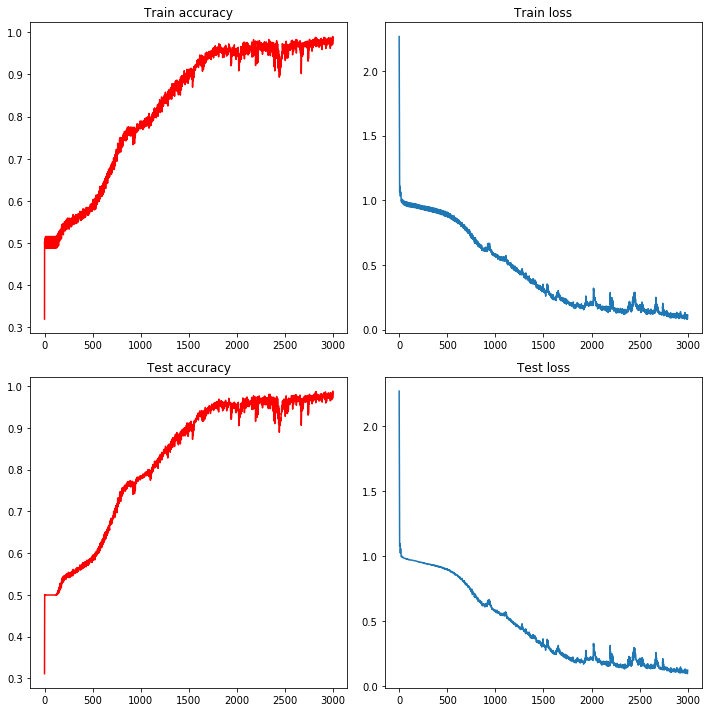

In [50]:
#Plots
fig = plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1)
plt.title('Train accuracy')
plt.plot(range(len(train_acc)), train_acc, color='r')
plt.subplot(2,2,2)
plt.title('Train loss')
plt.plot(range(len(train_losses)), train_losses)
plt.subplot(2,2,3)
plt.title('Test accuracy')
plt.plot(range(len(test_acc)), test_acc, color='r')
plt.subplot(2,2,4)
plt.title('Test loss')
plt.plot(range(len(test_losses)), test_losses)
plt.tight_layout()